<a href="https://colab.research.google.com/github/erinijapranckeviciene/MLdata/blob/main/Clustering_exercise_with_isuic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# isuic data 

In [49]:
import pandas as pd
# read the data
url="https://raw.githubusercontent.com/erinijapranckeviciene/MLdata/main/Kaggle-data-suic.csv"
data = pd.read_csv(url)

In [50]:
print(data.columns)

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')


Clean the data , change col names

In [51]:
isuic=data.drop(['suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'generation'], axis=1)
print(isuic.columns)



Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'gdp_per_capita ($)'],
      dtype='object')


In [52]:
print(isuic.dtypes)
#print(type(data)))

country               object
year                   int64
sex                   object
age                   object
suicides_no            int64
population             int64
gdp_per_capita ($)     int64
dtype: object


In [53]:
isuic['country'].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [54]:
isuic['age'].value_counts()

25-34 years    4642
15-24 years    4642
55-74 years    4642
75+ years      4642
35-54 years    4642
5-14 years     4610
Name: age, dtype: int64

Describe data

In [55]:
isuic.describe(include=['int','int64','float','object'])

,country,year,sex,age,suicides_no,population,gdp_per_capita ($)
count,27820,27820.000000,27820,27820,27820.000000,2.782000e+04,27820.000000
unique,101,NaN,2,6,NaN,NaN,NaN
top,Mauritius,NaN,female,25-34 years,NaN,NaN,NaN
freq,382,NaN,13910,4642,NaN,NaN,NaN
mean,NaN,2001.258375,NaN,NaN,242.574407,1.844794e+06,16866.464414
std,NaN,8.469055,NaN,NaN,902.047917,3.911779e+06,18887.576472
min,NaN,1985.000000,NaN,NaN,0.000000,2.780000e+02,251.000000
25%,NaN,1995.000000,NaN,NaN,3.000000,9.749850e+04,3447.000000
50%,NaN,2002.000000,NaN,NaN,25.000000,4.301500e+05,9372.000000
75%,NaN,2008.000000,NaN,NaN,131.000000,1.486143e+06,24874.000000


In [12]:
country=isuic['country']

# Explore the data to understand the variability and trends, i use seaborn
https://seaborn.pydata.org/examples/horizontal_boxplot.html 

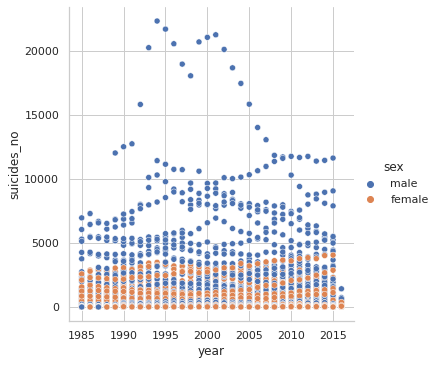

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")
# dynamics of male and female per year 
sns.relplot(x="year", y="suicides_no", hue="sex", data=isuic);

#sns.pairplot(data_new, hue="generation" )

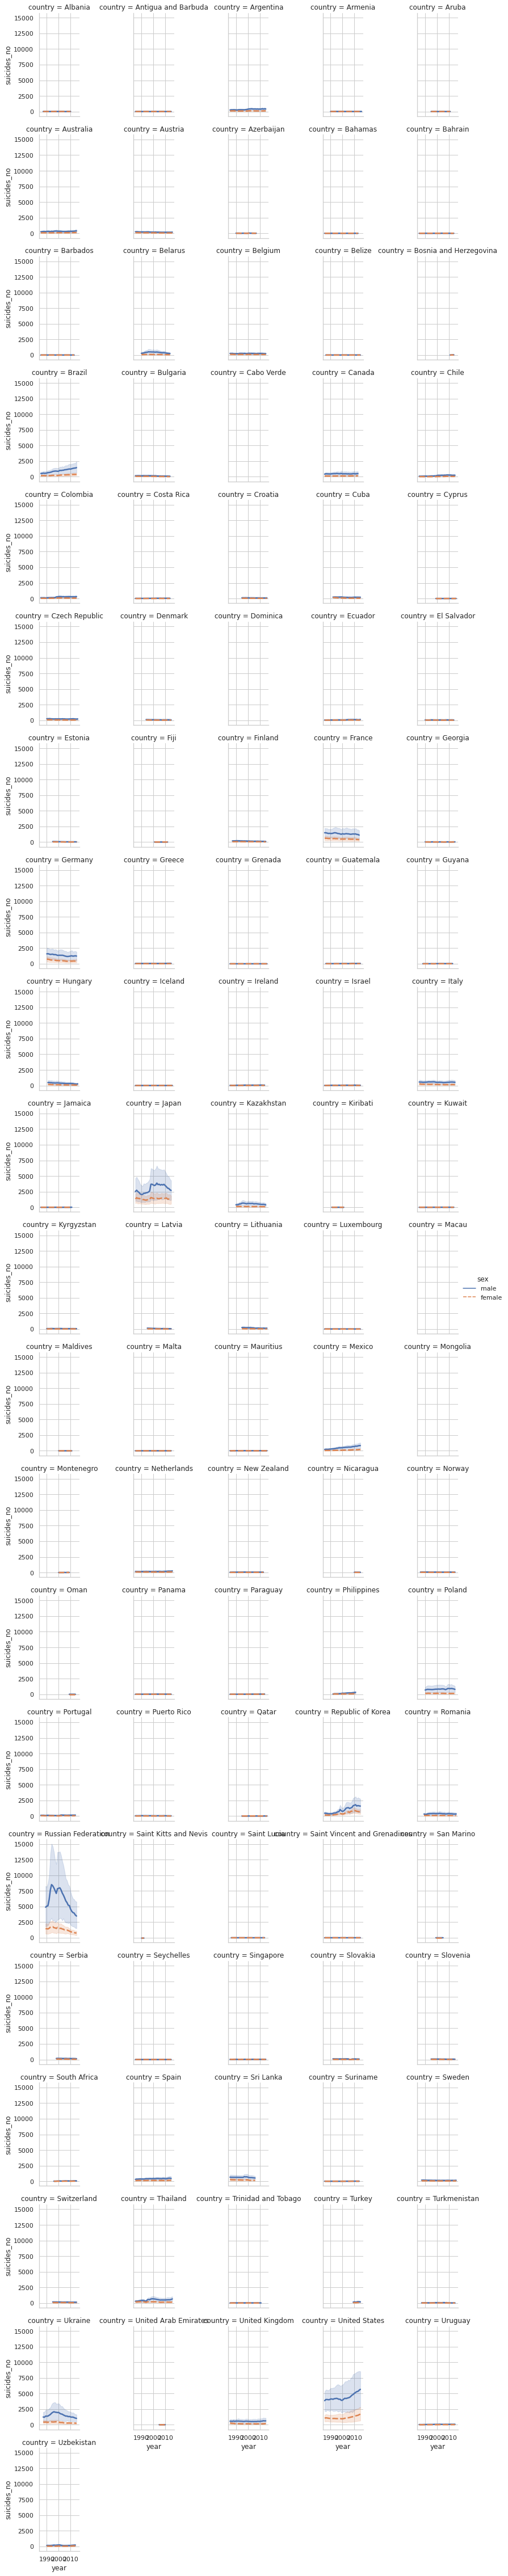

In [14]:
# what is the dynamics of male female suicides per country
sns.relplot(x="year", y="suicides_no", hue="sex", style="sex",
            col="country", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=isuic);

In some countries we see the trends. Countries perhaps should be analyzed separately. How many samples we have for each country? 

Lets separate the dataframe into two: one that has less than Q3 suicides and the rest

In [33]:
isuic_high=isuic[(isuic['suicides_no'] >= 242)]
isuic_moderate=isuic[(isuic['suicides_no'] < 242)]
print(isuic_high.shape)
print(isuic_moderate.shape)
print(isuic_high['country'].unique())
#dataframe[(dataframe['Sex'] == 'female') & (dataframe['Age'] >= 65)]

# male and female suicide dynamics is different, create separate groups
isuic_male=isuic[(isuic['sex'] =='male')]
isuic_female=isuic[(isuic['sex'] == 'female')]
print(" male")
print(isuic_male.shape)
print("female")
print(isuic_female.shape)



(4725, 7)
(23095, 7)
['Argentina' 'Australia' 'Austria' 'Belarus' 'Belgium' 'Brazil' 'Bulgaria'
 'Canada' 'Chile' 'Colombia' 'Croatia' 'Cuba' 'Czech Republic' 'Denmark'
 'Finland' 'France' 'Germany' 'Hungary' 'Italy' 'Japan' 'Kazakhstan'
 'Latvia' 'Lithuania' 'Mexico' 'Netherlands' 'Philippines' 'Poland'
 'Portugal' 'Republic of Korea' 'Romania' 'Russian Federation' 'Serbia'
 'Slovakia' 'Spain' 'Sri Lanka' 'Sweden' 'Switzerland' 'Thailand' 'Turkey'
 'Ukraine' 'United Kingdom' 'United States' 'Uzbekistan']
 male
(13910, 7)
female
(13910, 7)


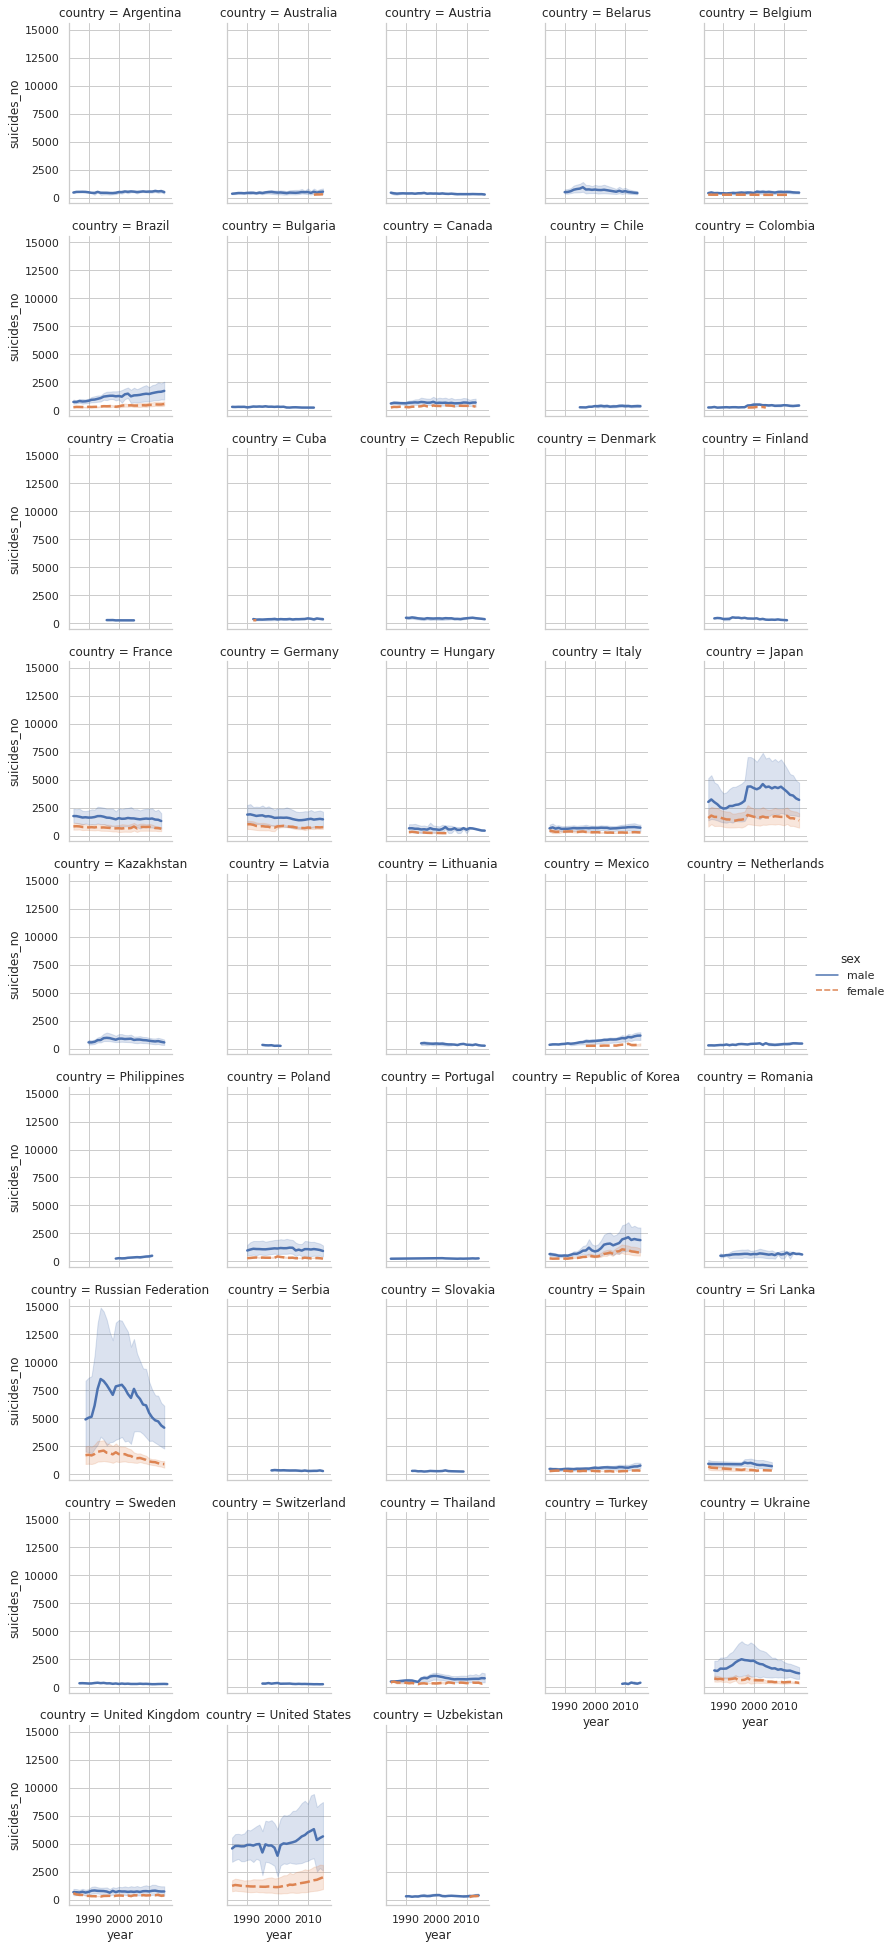

In [32]:
# what is the dynamics of male female suicides per country
sns.relplot(x="year", y="suicides_no", hue="sex", style="sex",
            col="country", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=isuic_high);

Combine country and gender

In [56]:
isuic['country_gender']=isuic['country'].map(str)+ '-' +isuic['sex'].map(str)
#isuic = isuic.reindex(['country_gender'], axis=1)
isuic.head()

,country,year,sex,age,suicides_no,population,gdp_per_capita ($),country_gender
0,Albania,1987,male,15-24 years,21,312900,796,Albania-male
1,Albania,1987,male,35-54 years,16,308000,796,Albania-male
2,Albania,1987,female,15-24 years,14,289700,796,Albania-female
3,Albania,1987,male,75+ years,1,21800,796,Albania-male
4,Albania,1987,male,25-34 years,9,274300,796,Albania-male


Distribution of suicides_no in countries - all years together : males and females. This way we will see the differences 

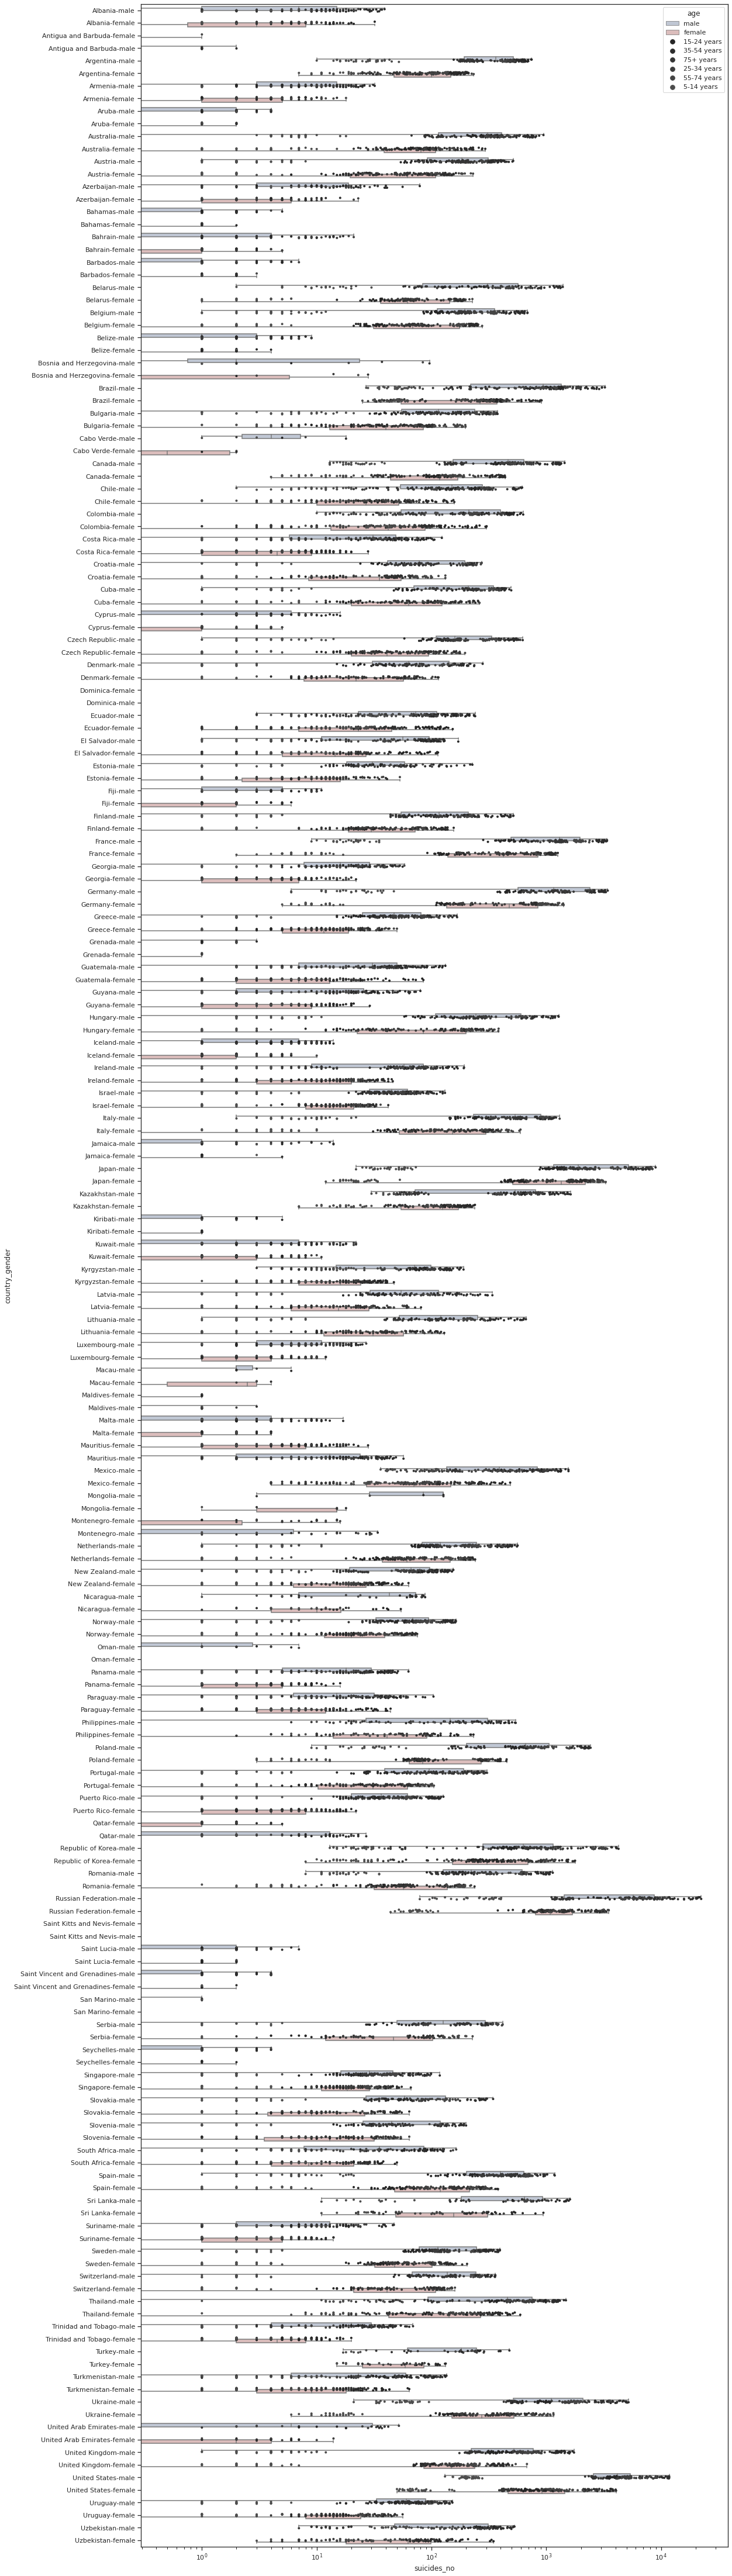

In [67]:
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(18, 80))
ax.set_xscale("log")

# Plot the suicide no for males over countries with horizontal boxes
sns.boxplot(x="suicides_no", y="country_gender", data=isuic, whis=[0, 100], width=.6, hue="sex", palette="vlag")

# Add in points to show each observation
sns.stripplot(x="suicides_no", y="country_gender", data=isuic, size=4, color=".3", hue="age", linewidth=0)

The year might be informative feature - therefore lets change it to categorical


In [76]:
# first we analyze males data
isuic_male['Year']=isuic['year'].map(str)
# drop columns that are obsolete 
isuic_male.head()

,country,year,sex,age,suicides_no,population,gdp_per_capita ($),Year
0,Albania,1987,male,15-24 years,21,312900,796,1987
1,Albania,1987,male,35-54 years,16,308000,796,1987
3,Albania,1987,male,75+ years,1,21800,796,1987
4,Albania,1987,male,25-34 years,9,274300,796,1987
8,Albania,1987,male,55-74 years,1,137500,796,1987


In [77]:
isuic_male_reduced=isuic_male.drop(["year","sex","population"], axis=1)
year_male_data=isuic_male["year"]
country_male_data=isuic_male["country"]

isuic_male_reduced.head()

,country,age,suicides_no,gdp_per_capita ($),Year
0,Albania,15-24 years,21,796,1987
1,Albania,35-54 years,16,796,1987
3,Albania,75+ years,1,796,1987
4,Albania,25-34 years,9,796,1987
8,Albania,55-74 years,1,796,1987


"one hot encoding" for categorical data 

In [78]:
isuic_male_reduced_dummies=pd.get_dummies(isuic_male_reduced)
list(isuic_male_reduced_dummies.columns)

['suicides_no',
 'gdp_per_capita ($)',
 'country_Albania',
 'country_Antigua and Barbuda',
 'country_Argentina',
 'country_Armenia',
 'country_Aruba',
 'country_Australia',
 'country_Austria',
 'country_Azerbaijan',
 'country_Bahamas',
 'country_Bahrain',
 'country_Barbados',
 'country_Belarus',
 'country_Belgium',
 'country_Belize',
 'country_Bosnia and Herzegovina',
 'country_Brazil',
 'country_Bulgaria',
 'country_Cabo Verde',
 'country_Canada',
 'country_Chile',
 'country_Colombia',
 'country_Costa Rica',
 'country_Croatia',
 'country_Cuba',
 'country_Cyprus',
 'country_Czech Republic',
 'country_Denmark',
 'country_Dominica',
 'country_Ecuador',
 'country_El Salvador',
 'country_Estonia',
 'country_Fiji',
 'country_Finland',
 'country_France',
 'country_Georgia',
 'country_Germany',
 'country_Greece',
 'country_Grenada',
 'country_Guatemala',
 'country_Guyana',
 'country_Hungary',
 'country_Iceland',
 'country_Ireland',
 'country_Israel',
 'country_Italy',
 'country_Jamaica',
 'co

New data for males to explore the structure and clustering




# Clustering

Try dimensionality reduction to see what linear transformation gives us

In [79]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
X=isuic_male_reduced_dummies
pca= PCA()
X_pca=pca.fit(X).transform(X)
# Percentage of variance explained for each components
print('explained variance ratio ( pay attention to the first two components): %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio ( pay attention to the first two components): [9.95878533e-01 4.12145888e-03 4.65811867e-10 4.65811867e-10
 4.65811867e-10 4.64208780e-10 4.44008476e-10 1.06955638e-10
 1.05758717e-10 1.05535033e-10 1.03677045e-10 1.03651286e-10
 1.03560282e-10 1.03111569e-10 1.02606837e-10 1.02156452e-10
 1.01588719e-10 1.01158161e-10 1.00167649e-10 9.83600700e-11
 9.69661797e-11 9.50881312e-11 9.47080090e-11 9.36320990e-11
 9.27633042e-11 9.18231754e-11 8.33854102e-11 8.04166600e-11
 7.83924494e-11 7.78607536e-11 7.71245013e-11 7.50049235e-11
 6.73703119e-11 6.37560325e-11 6.06766098e-11 5.89755784e-11
 5.80050081e-11 3.83344447e-11 3.83326440e-11 3.83250582e-11
 3.82034139e-11 3.73291716e-11 3.73291716e-11 3.73291716e-11
 3.73291716e-11 3.73291716e-11 3.73291716e-11 3.73291716e-11
 3.73291716e-11 3.73291716e-11 3.73291716e-11 3.73291716e-11
 3.73291716e-11 3.73291716e-11 3.73291716e-11 3.73291716e-11
 3.73291716e-11 3.66564230e-11 3.64625891e-11 3.62083100e-11
 3.61250048e-1

[-287.50568895 -292.50558469 -307.50553746 ...   32.41669769 -297.58065041
 -254.5810162 ]


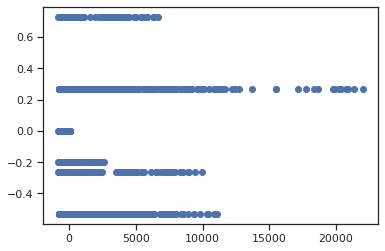

In [80]:
print(X_pca[:,1])
plt.scatter(X_pca[:,1],X_pca[:,2])
plt.show()

strange structure, what it might mean? 

In [81]:
from sklearn.preprocessing import StandardScaler
Xscaled = StandardScaler().fit_transform(X)
X_pca_scaled=pca.fit(Xscaled).transform(Xscaled)
# Percentage of variance explained for each components
print('explained variance ratio for scaled data ( pay attention to the first two components): %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio for scaled data ( pay attention to the first two components): [1.40174098e-02 1.26686318e-02 9.36604188e-03 9.13019924e-03
 8.78275804e-03 8.65001703e-03 8.51259662e-03 8.51259662e-03
 8.51259662e-03 8.47519044e-03 8.37707432e-03 8.33888249e-03
 8.22111833e-03 8.17479377e-03 8.14985416e-03 8.05130215e-03
 8.03396855e-03 7.87214494e-03 7.81663372e-03 7.80395163e-03
 7.77197355e-03 7.73933887e-03 7.71176823e-03 7.67907201e-03
 7.62475321e-03 7.60719397e-03 7.59306610e-03 7.54866047e-03
 7.52629760e-03 7.51940387e-03 7.50049698e-03 7.48273115e-03
 7.47819734e-03 7.45280879e-03 7.43780898e-03 7.42722330e-03
 7.40226132e-03 7.36533874e-03 7.19093828e-03 7.19093579e-03
 7.19067441e-03 7.18831844e-03 7.18831844e-03 7.18831844e-03
 7.18831844e-03 7.18831844e-03 7.18831844e-03 7.18831844e-03
 7.18831844e-03 7.18831844e-03 7.18831844e-03 7.18831844e-03
 7.18831844e-03 7.18831844e-03 7.18831844e-03 7.18831844e-03
 7.18831844e-03 7.18733086e-03 7.18634047e-03 7.18537328e-0

[-0.11075062  0.5074958  -0.21699756 ... -0.01008197 -0.28247665
 -0.4321476 ]


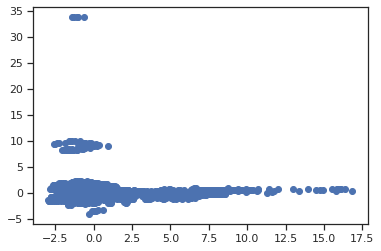

In [84]:
print(X_pca_scaled[:,1])
plt.scatter(X_pca_scaled[:,1],X_pca_scaled[:,2])
plt.show()

Lets try DBSCAN on scaled data

In [90]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
db=DBSCAN(eps=5, min_samples=20)
db.fit(X_pca_scaled)
len(db.core_sample_indices_)
#plt.scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1],c=db.labels_)


0

In [91]:
np.unique(db.labels_)


array([-1])

DBSCAN does not work from scratch. 

## t-SNE

In [ ]:
# Perform t-distributed stochastic neighbor embedding.
t0 = time()
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
trans_data = tsne.fit_transform(sphere_data).T
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))

ax = fig.add_subplot(2, 5, 10)
plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

plt.show()